# Apprentissage automatique

## TP N°3 - Apprentissage automatique
### Le Perceptron multicouche

### 1 - Chargement des données de MNIST

In [2]:
# Insertion des bibliothèques
import mnist
import numpy as np
import matplotlib.pyplot as plt

In [3]:
print("La version de numpy est :", np.__version__)

La version de numpy est : 1.26.4


In [4]:
# Data loading

mnistData = mnist.MNIST("Data\\MNIST") # Path of the four ubyte files.
trainData, trainLabels = mnistData.load_training()
testData, testLabels = mnistData.load_testing()
trainData = np.array(trainData)
trainLabels = np.array(trainLabels).reshape(len(trainLabels), 1)
testData = np.array(testData)
testLabels = np.array(testLabels).reshape(1, len(testLabels))

In [5]:
# Visualisation du contenu d’une image 

print(mnist.MNIST().display(trainData[7])) # I is the index of the image et peut être n'importe quel chifre


............................
............................
............................
............................
............................
..............@@@@@@........
...........@@@@@@@@@@.......
..........@@@@@@@@@@@@......
..........@@@.....@@@@......
..................@@@.......
..................@@@.......
..................@@@.......
...............@@@@@@.......
..............@@@@@.........
.........@@@@@@@@@..........
.........@@@@@@@@@@.........
.................@@.........
.................@@.........
.................@@.........
................@@@.........
.......@.......@@@@.........
.....@@@.....@@@@...........
.....@@@@@@@@@@@............
.......@@@@@@@..............
........@@..................
............................
............................
............................


Le résultat obtenu n'est pas fiable/correcte. Une modification est nécessaire.

### 2 Normalisation des données

La méthode d’optimisation liée au Perceptron multicouche (c.-à-d. la descente de gradient),
est optimale lorsque les données sont dans un interval particulier Xn ∈ [0, 1]. Ainsi, normalisez
les données des bases WDBC et MNIST par leur maximum.

In [6]:
# Data loading

mnistData = mnist.MNIST("Data\\MNIST") # Path of the four ubyte files.
trainData, trainLabels = mnistData.load_training()
testData, testLabels = mnistData.load_testing()
trainData = np.array(trainData)/255 # afin de diviser par des floatant toujours entre 0 et 1
trainLabels = np.array(trainLabels).reshape(len(trainLabels), 1)
testData = np.array(testData)/255
testLabels = np.array(testLabels).reshape(1, len(testLabels))

In [7]:
trainLabelsMatrix = np.zeros((trainLabels.size, 10))
for n in range(trainLabels.size):
    trainLabelsMatrix[n, trainLabels[n]] = 1
    
# return trainData, trainLabelsMatrix, testData, testLabels

In [8]:
# Visualisation du contenu d’une image 

print(mnist.MNIST().display(trainData[4])) # I is the index of the image et peut être n'importe quel chifre


............................
............................
............................
............................
............................
............................
............................
............................
............................
............................
............................
............................
............................
............................
............................
............................
............................
............................
............................
............................
............................
............................
............................
............................
............................
............................
............................
............................


In [9]:
def readMnist(mnistPath) : 
    mnistData = mnist.MNIST(mnistPath) # Path of the four ubyte files.
    trainData, trainLabels = mnistData.load_training()
    testData, testLabels = mnistData.load_testing()
    trainData = np.array(trainData)/255 # afin de diviser par des floatant toujours entre 0 et 1
    trainLabels = np.array(trainLabels).reshape(len(trainLabels), 1)
    testData = np.array(testData)/255
    testLabels = np.array(testLabels).reshape(1, len(testLabels))
    trainLabelsMatrix = np.zeros((trainLabels.size, 10))
    for n in range(trainLabels.size):
        trainLabelsMatrix[n, trainLabels[n]] = 1
        
    return trainData, trainLabelsMatrix, testData, testLabels

trainData, trainLabels, testData, testLabels = readMnist("Data\\MNIST")
print(trainData[12, :])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

### 3 Fonction d’activation

Afin que le réseau de neurones apprenne, il est nécessaire de définir une fonction d’activation.
Dans notre cas, nous utiliserons la fonction sigmoïde, voir équation 1 ainsi que sa dérivée pour
l’étape de back-propagation, voir équation 2. Où derivate vaut False si on souhaite calculer f(x) et True si on souhaite calculer f′(x).

In [10]:
def sigmoid(x, derivate=False):
    fx = 1/(1+ np.exp(-x))
    if derivate:
        return fx*(1 - fx)
    return fx

### 4 Apprentissage du réseau de neurones

Dans cette partie, on souhaite définir le réseau de neurones et l’entraîner sur les données d’entraînement. Pour un meilleur apprentissage, nous utiliserons la technique du batch-processing.

Notre réseau de neurones sera défini comme suit :

• Nombre de neurones d’entrées : 3 pour WDBC - 28 ∗ 28 = 784 pour MNIST.

• Nombre de couches cachées : 1.

• Nombre de neurones dans le niveau caché : 20 pour WDBC - 30 pour MNIST.

• Nombre de neurones de sorties : 1 pour WDBC - 10 pour MNIST.


Afin de créer ce réseau, définissez la fonction suivante :

In [11]:
def trainNeuralNetwork(input, output, hiddenLayerSize, batchSize, learningRate,numberOfIterations):
    """ Train neural network"""
    inputSize = input.shape[1]
    outputSize = output.shape[1]
    errors = np.zeros(numberOfIterations)
    
    # Initialisation des poids
    weigths0 = np.random.rand(inputSize, hiddenLayerSize)/batchSize
    weigths1 = np.random.rand(hiddenLayerSize, outputSize)/batchSize
    
    # Algorithme
    for i in range(numberOfIterations):
        # Calcul de la sortie de chaque couche 
        # Y l = f(qN i=1 WilXil)
        layer0 = input
        layer1 = sigmoid(layer0.dot(weigths0))
        layer2 = sigmoid(layer1.dot(weigths1))
        
        
        # Calcul de l’erreur d’apprentissage El
        layer2Error = output - layer2
        errors[i] = np.mean(np.sum(abs(layer2Error),1))
        
        # Rétropropagation de l’erreur par descente de gradient
        layer2Delta = layer2Error*sigmoid(layer1.dot(weigths1),True)
        layer1Error = layer2Delta.dot(weigths1.transpose())
        layer1Delta = layer1Error*sigmoid(layer0.dot(weigths0),True)
        
        # Mise à jour des poids Wli
        weigths0 += learningRate*layer0.transpose().dot(layer1Delta)
        weigths1 += learningRate*layer1.transpose().dot(layer2Delta)
    
    return weigths0,weigths1,errors

In [12]:
trainData, trainLabels, testData, testLabels = readMnist("Data\\MNIST")
trainNeuralNetwork(trainData, trainLabels, 30 ,50 , 10,5)

C:\Users\Elisabeth\AppData\Local\Temp\ipykernel_2360\1238430488.py:2: RuntimeWarning: overflow encountered in exp
  fx = 1/(1+ np.exp(-x))


(array([[0.00829001, 0.00335082, 0.0062793 , ..., 0.00362094, 0.00376986,
         0.01993916],
        [0.0163058 , 0.01765335, 0.00792565, ..., 0.01844101, 0.00595729,
         0.01339285],
        [0.0114012 , 0.00415473, 0.01804638, ..., 0.01096212, 0.00405876,
         0.01921655],
        ...,
        [0.01953891, 0.01691806, 0.01407447, ..., 0.01742836, 0.01449745,
         0.01696711],
        [0.01749593, 0.01357308, 0.0088447 , ..., 0.00885303, 0.01047079,
         0.01602733],
        [0.01388382, 0.01675935, 0.00564935, ..., 0.01375161, 0.00434355,
         0.0162754 ]]),
 array([[-48189.41639224, -47925.39773891, -48275.98757912,
         -48271.49800821, -48721.04099264, -49793.38698457,
         -48934.0817977 , -48629.08598685, -48640.96085871,
         -48790.60944458],
        [-49077.06032568, -48642.86064414, -49189.85833659,
         -49161.7551828 , -49594.74333124, -50601.54751763,
         -49692.91220927, -49413.37141195, -49452.79890665,
         -49629.048010

=> overflow ormal car fonction d'apprentissage pas fonctionnel (outofnumber)

In [13]:
def trainNeuralNetwork(input, output, hiddenLayerSize, batchSize, learningRate,numberOfIterations):
    """ Train neural network"""
    inputSize = input.shape[1]
    outputSize = output.shape[1]
    errors = np.zeros(numberOfIterations)
    
    # Initialisation des poids
    weigths0 = np.random.rand(inputSize, hiddenLayerSize)/inputSize
    weigths1 = np.random.rand(hiddenLayerSize, outputSize)/hiddenLayerSize
    
    # Algorithme
    for i in range(numberOfIterations):
        n = np.random.randint(0,input.shape[0] - batchSize +1)
        # Calcul de la sortie de chaque couche 
        # Y l = f(qN i=1 WilXil)
        layer0 = input[n:n + batchSize, :]
        layer1 = sigmoid(layer0.dot(weigths0))
        layer2 = sigmoid(layer1.dot(weigths1))
        
        
        # Calcul de l’erreur d’apprentissage El
        layer2Error = output[n:n + batchSize, :] - layer2
        errors[i] = np.mean(np.sum(abs(layer2Error),1))
        
        # Rétropropagation de l’erreur par descente de gradient
        layer2Delta = layer2Error*sigmoid(layer1.dot(weigths1),True)
        layer1Error = layer2Delta.dot(weigths1.transpose())
        layer1Delta = layer1Error*sigmoid(layer0.dot(weigths0),True)
        
        # Mise à jour des poids Wli
        weigths0 += learningRate*layer0.transpose().dot(layer1Delta)/batchSize
        weigths1 += learningRate*layer1.transpose().dot(layer2Delta)/batchSize
    
    return weigths0,weigths1,errors

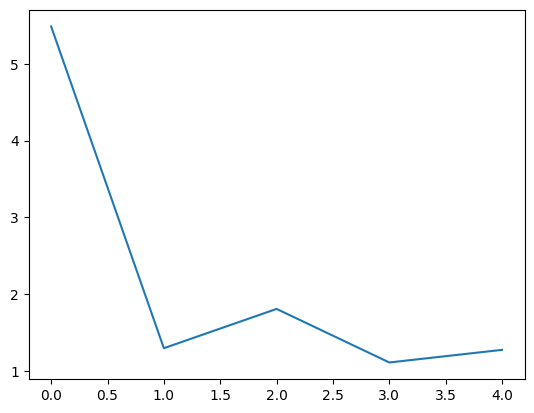

In [14]:
trainData, trainLabels, testData, testLabels = readMnist("Data\\MNIST")
weigths0,weigths1,errors = trainNeuralNetwork(trainData, trainLabels, 30 ,50 , 10,5)
plt.plot(errors)
plt.show()

=> plus d'overflow

In [15]:
def applyNeuralNetWork(input, weigths0, weigths1):
    """Apply neurol network"""
    layer0 = input
    layer1 = sigmoid(layer0.dot(weigths0))
    layer2 = sigmoid(layer1.dot(weigths1))
    return layer2

In [25]:
trainData, trainLabels, testData, testLabels = readMnist("Data\\MNIST")
weigths0,weigths1,errors = trainNeuralNetwork(trainData, trainLabels, 30 ,50 , 10,15000)
# plt.plot(errors)
testLabelsPredicted = applyNeuralNetWork(testData, weigths0, weigths1)
# plt.show()
testLabelsPredicted = np.argmax(testLabelsPredicted, 1)
print(100*np.mean(testLabelsPredicted == testLabels))

95.17


Il faut rajouter des valeurs afin d'avoir un résultat cohérent